## Fixed Random Seed

In [1]:
import numpy as np
import random
import os

from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 데이터 불러오기 및 확인

In [2]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

display(train.head(3))
display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


In [3]:
train.shape, test.shape

((20000, 23), (10000, 22))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [5]:
train.describe(include='all')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
count,20000,20000.000000,20000,20000,20000,20000.000000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000,20000.000000
unique,20000,NaN,2,17,8,NaN,24,15,5,10,...,5,43,43,43,6,NaN,NaN,NaN,3,NaN
top,TRAIN_00000,NaN,F,High graduate,Children or Armed Forces,NaN,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),NaN,NaN,NaN,Under Median,NaN
freq,1,NaN,10472,6494,11142,NaN,4688,4688,16845,17769,...,17825,17825,16563,16594,8588,NaN,NaN,NaN,13237,NaN
mean,NaN,35.632500,NaN,NaN,NaN,34.943050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,383.129500,40.202150,123.451450,NaN,554.565250
std,NaN,17.994414,NaN,NaN,NaN,22.254592,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4144.247487,279.182677,1206.949429,NaN,701.553155
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,34.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,500.000000
75%,NaN,47.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,875.000000


## 데이터 전처리 1 : 학습 및 추론 데이터 설정

In [6]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

## 데이터 전처리 2 : 범주형 변수 수치화

In [7]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    
    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_x[i] = train_x[i].astype(str)
    test_x[i] = test_x[i].astype(str)
    
    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test_x[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case)
    
    test_x[i] = le.transform(test_x[i])

In [8]:
train_x.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,63,1,15,2,4,20,11,4,0,1,...,4,2,39,39,39,4,0,0,0,2
1,37,1,1,2,52,6,11,4,0,4,...,4,2,39,39,39,5,0,0,0,1
2,58,0,12,2,52,11,0,1,0,1,...,4,2,39,39,39,2,3411,0,0,1
3,44,1,12,2,52,19,12,4,0,0,...,4,2,39,39,39,5,0,0,0,1
4,37,0,12,2,52,19,10,4,0,0,...,4,2,39,39,39,0,0,0,0,2


In [9]:
train_y.head()

0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

In [10]:
test_x.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,1,9,0,0,14,14,4,0,5,...,4,2,39,40,40,5,0,0,0,1
1,47,1,7,0,0,14,14,4,8,5,...,0,2,39,39,39,4,0,0,0,1
2,18,0,9,0,52,19,11,4,0,5,...,0,2,39,39,39,5,0,0,0,1
3,39,0,1,2,30,12,11,4,0,1,...,7,2,39,39,39,2,0,0,0,2
4,6,1,3,0,0,14,14,4,6,5,...,2,2,39,39,39,4,0,0,0,2


# Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [12]:
print(type(train_x))

<class 'numpy.ndarray'>


In [13]:
train_x[:10]

array([[ 1.52092668,  1.04836845,  1.64179358,  0.79705172, -1.39044668,
         1.27637293,  0.59727235,  0.41558165, -0.32180196, -0.79784481,
        -0.16410792, -0.06400232,  0.21681676,  0.27073469,  0.3440131 ,
         0.34662534,  0.59190919, -0.09245082, -0.14400304, -0.10228642,
         1.42026603],
       [ 0.07599771,  1.04836845, -1.39981212,  0.79705172,  0.76646547,
        -1.19942855,  0.59727235,  0.41558165, -0.32180196,  0.63596741,
         0.05222918, -0.06400232,  0.21681676,  0.27073469,  0.3440131 ,
         0.34662534,  1.24203735, -0.09245082, -0.14400304, -0.10228642,
        -0.51062382],
       [ 1.24305572, -0.95386312,  0.99002093,  0.79705172,  0.76646547,
        -0.31521374, -1.59990372, -2.30716339, -0.32180196, -0.79784481,
        -0.16410792, -0.06400232,  0.21681676,  0.27073469,  0.3440131 ,
         0.34662534, -0.70834714,  0.73063836, -0.14400304, -0.10228642,
        -0.51062382],
       [ 0.46501704,  1.04836845,  0.99002093,  0.79705172

In [14]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

## 1-4 DNN model design

In [29]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras

model = models.Sequential()
model.add(layers.Input(shape=(21,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.25))

model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2816      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                     

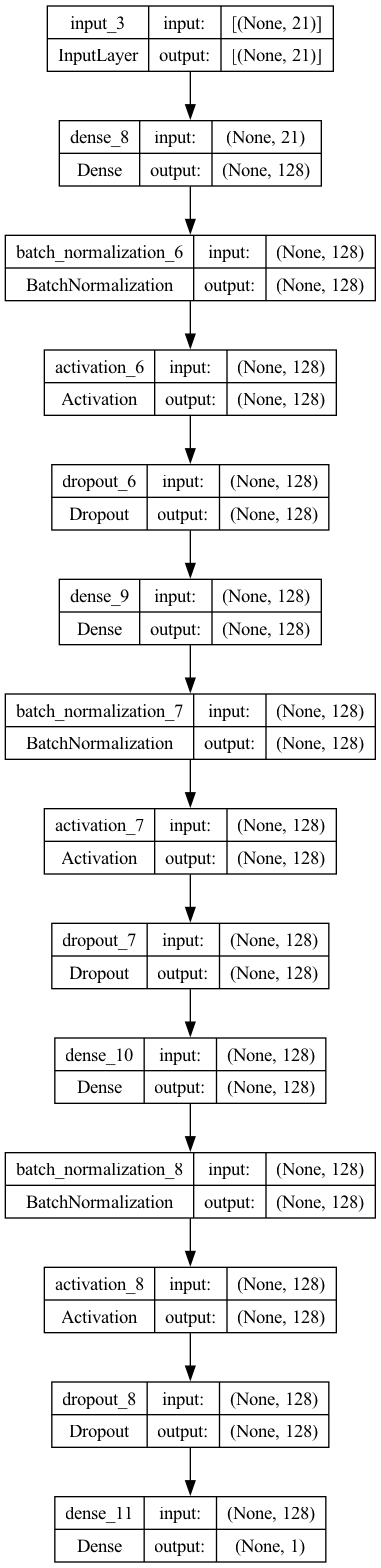

In [30]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## 1-5 Complie model and training

In [42]:
from keras.optimizers import SGD, Adam, Adamax, Adagrad, Adadelta, RMSprop
from keras import backend as K

# Define the learning rate
learning_rate = 0.0001

# Define the optimizer with the learning rate
optimizer = Adamax(learning_rate=learning_rate)

def root_mean_squared_error(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compile the model with the optimizer
model.compile(loss=root_mean_squared_error,
              optimizer=optimizer,
              metrics=['mae'])

In [43]:
check_point_cb = callbacks.ModelCheckpoint('dacon_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_x, train_y, 
                     epochs=100,
                     validation_data=(val_x, val_y),
                     callbacks=[check_point_cb, early_stopping_cb])

train_x, val_x, train_y, val_y

Epoch 1/100


500/500 [==============================] - 23s 43ms/step - loss: 556.4498 - mae: 350.4366 - val_loss: 549.3312 - val_mae: 346.5627
Epoch 2/100
  3/500 [..............................] - ETA: 19s - loss: 458.4722 - mae: 310.6962

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 21s 42ms/step - loss: 558.4569 - mae: 350.1747 - val_loss: 549.3312 - val_mae: 346.5729
Epoch 3/100
500/500 [==============================] - 21s 42ms/step - loss: 556.3356 - mae: 349.7972 - val_loss: 549.3433 - val_mae: 346.4143
Epoch 4/100
500/500 [==============================] - 21s 41ms/step - loss: 558.9471 - mae: 349.9665 - val_loss: 549.4751 - val_mae: 346.7372
Epoch 5/100
500/500 [==============================] - 21s 42ms/step - loss: 556.5554 - mae: 349.2710 - val_loss: 549.6517 - val_mae: 346.8835
Epoch 6/100
500/500 [==============================] - 21s 43ms/step - loss: 557.7410 - mae: 350.1169 - val_loss: 549.4710 - val_mae: 346.3853


(array([[-0.97991193, -0.95386312, -0.74803947, ..., -0.14400304,
         -0.10228642, -0.51062382],
        [ 0.46501704, -0.95386312,  0.99002093, ..., -0.14400304,
         -0.10228642, -0.51062382],
        [ 0.02042352, -0.95386312,  0.99002093, ..., -0.14400304,
         -0.10228642, -0.51062382],
        ...,
        [-1.42450545, -0.95386312, -0.96529702, ..., -0.14400304,
         -0.10228642,  1.42026603],
        [ 0.63173962, -0.95386312,  0.12099073, ..., -0.14400304,
         -0.10228642, -0.51062382],
        [-0.09072487, -0.95386312,  0.99002093, ..., -0.14400304,
         -0.10228642,  1.42026603]]),
 array([[-0.64646678,  1.04836845, -0.74803947, ..., -0.14400304,
         -0.10228642, -0.51062382],
        [-0.25744744,  1.04836845,  0.77276338, ...,  6.09221313,
         -0.10228642,  1.42026603],
        [-0.14629906,  1.04836845,  1.42453603, ..., -0.14400304,
         -0.10228642, -0.51062382],
        ...,
        [ 1.85437182,  1.04836845, -0.09626682, ..., -

In [33]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [34]:

def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_mae')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

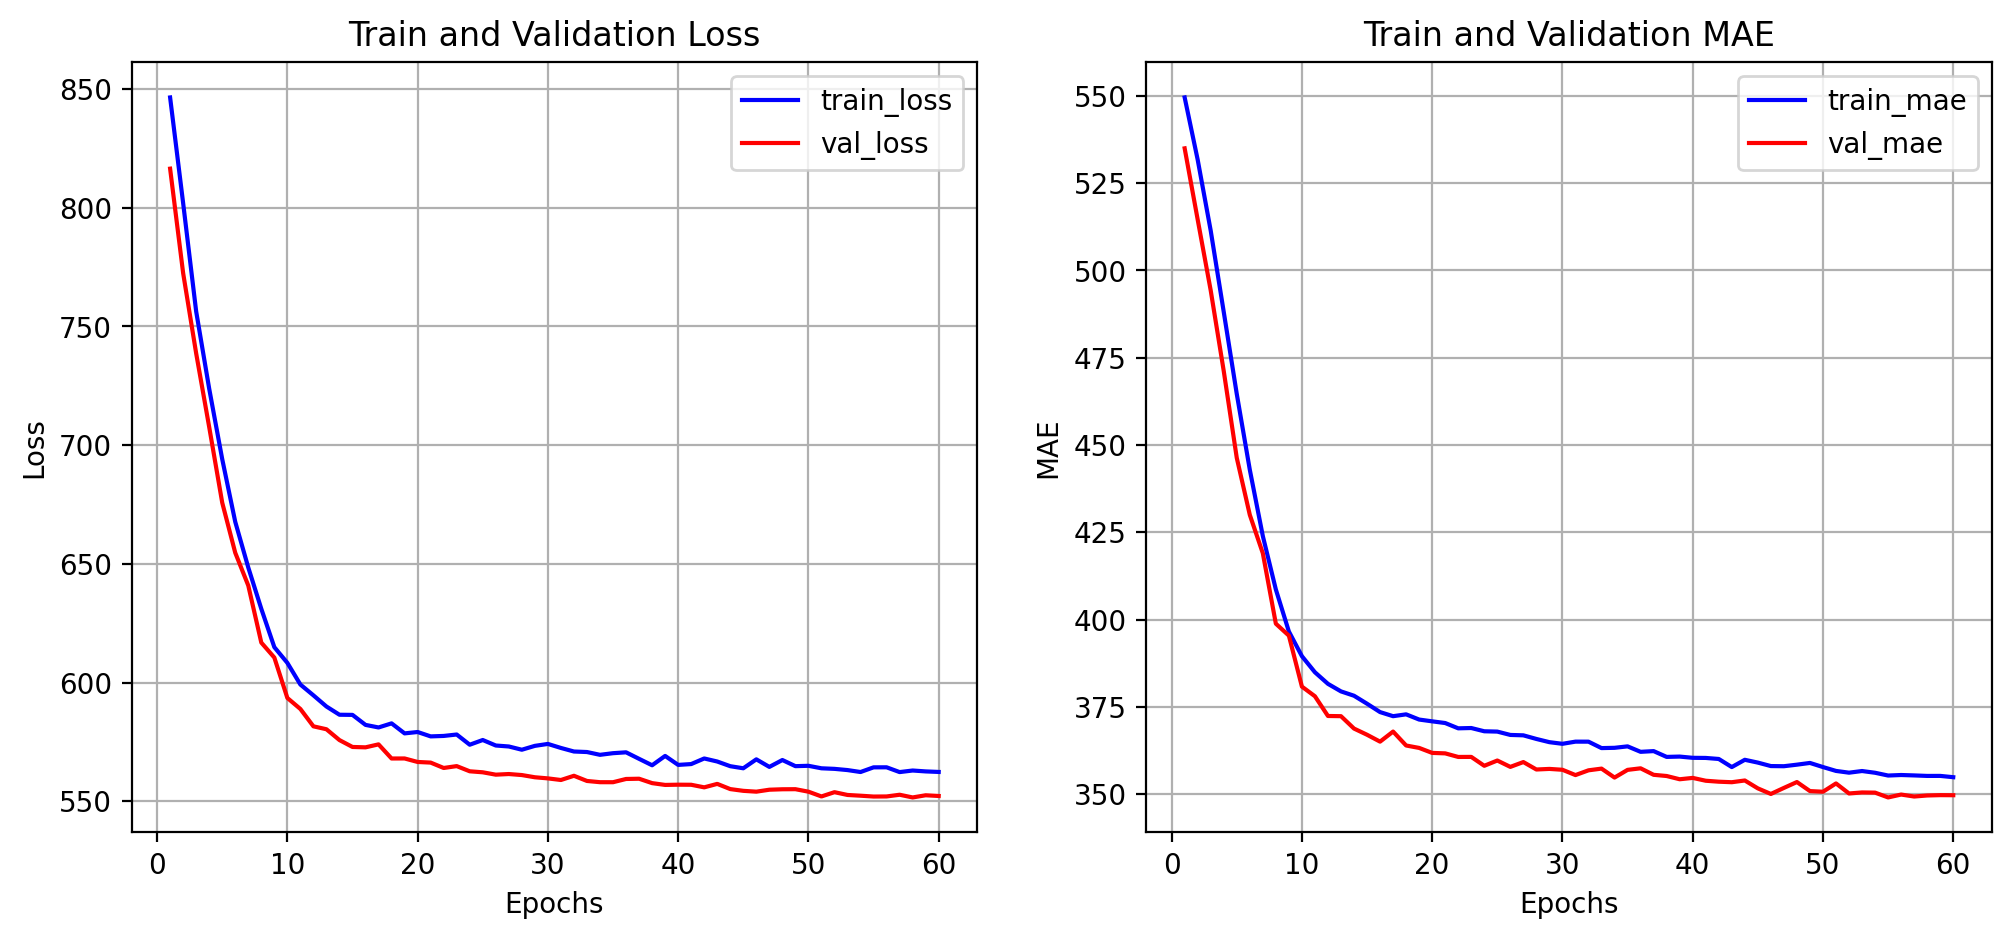

In [35]:
show_history_r(history)

## 예측 수행

In [36]:
preds = model.predict(test_x)

313/313 [==============================] - 1s 4ms/step


## 제출양식에 예측결과 입력

In [37]:
submission = pd.read_csv('./sample_submission.csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,9.838421
1,TEST_0001,12.287467
2,TEST_0002,423.378082
3,TEST_0003,901.591370
4,TEST_0004,12.851710
...,...,...
9995,TEST_9995,699.994080
9996,TEST_9996,926.281067
9997,TEST_9997,363.486664
9998,TEST_9998,15.557644


## 예측결과 저장

In [38]:
submission.to_csv('./dacon_submission03.csv', index=False)